In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from tqdm import tqdm
import seaborn as sns 
from pept import PointData
from scipy.interpolate import interp1d
from sklearn.neighbors import KernelDensity
import pandas as pd
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})
%matplotlib widget

In [5]:
sLambda_sTau = np.load("/home/rayhaan/randomWalk_V3/Data/ridgeDataEdgeCases/Lambda_0.10mm_Tau_0.1ms.npy", allow_pickle = True)
sLambda_lTau = np.load("/home/rayhaan/randomWalk_V3/Data/ridgeDataEdgeCases/Lambda_0.10mm_Tau_1.0ms.npy", allow_pickle = True)
lLambda_sTau = np.load("/home/rayhaan/randomWalk_V3/Data/ridgeDataEdgeCases/Lambda_2.00mm_Tau_0.1ms.npy", allow_pickle = True)
lLambda_lTau = np.load("/home/rayhaan/randomWalk_V3/Data/ridgeDataEdgeCases/Lambda_2.00mm_Tau_1.0ms.npy", allow_pickle = True)


In [10]:
sLambda_sTau[1]

array([array([3.07340258e-62, 5.36902993e-62, 9.36893723e-62, 1.63306312e-61,
              2.84337250e-61, 4.94518675e-61, 8.59112018e-61, 1.49085380e-60,
              2.58427361e-60, 4.47466069e-60, 7.73926844e-60, 1.33708158e-59,
              2.30745959e-59, 3.97766780e-59, 6.84922022e-59, 1.17807238e-58,
              2.02404912e-58, 3.47366842e-58, 5.95489238e-58, 1.01971246e-57,
              1.74421412e-57, 2.98016380e-57, 5.08626224e-57, 8.67112894e-57,
              1.47662709e-56, 2.51179573e-56, 4.26791842e-56, 7.24379608e-56,
              1.22810258e-55, 2.07979919e-55, 3.51824842e-55, 5.94497380e-55,
              1.00344077e-54, 1.69181124e-54, 2.84924921e-54, 4.79321984e-54,
              8.05457532e-54, 1.35199891e-53, 2.26687953e-53, 3.79663593e-53,
              6.35166943e-53, 1.06143951e-52, 1.77182593e-52, 2.95437285e-52,
              4.92071271e-52, 8.18670576e-52, 1.36053221e-51, 2.25853568e-51,
              3.74510136e-51, 6.20324162e-51, 1.02634254e-50, 1.

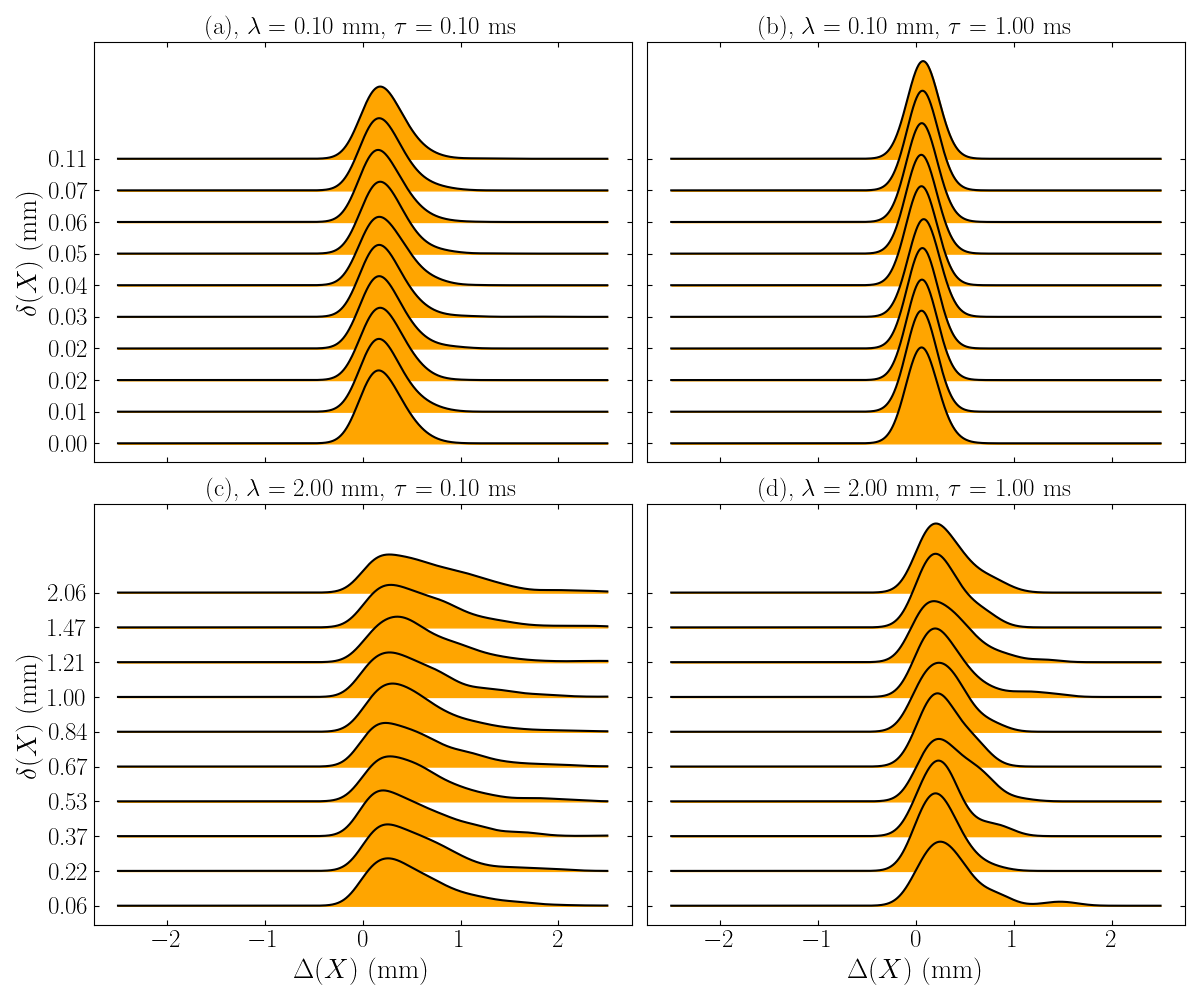

In [26]:
plt.close("all")
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (12, 10), sharex = "col", sharey = "row")
s = 20

shiftVal = 0.8
xValues = np.linspace(-2.5, 2.5, 1000)
shift = 0
yVals = []
for i in range(len(sLambda_sTau[0])):
    ax1.plot(xValues, sLambda_sTau[1][i] + shift, color = 'k', lw = 1.5)
    ax1.fill_between(x = xValues, y1 = sLambda_sTau[1][i] + shift, y2 = np.repeat(shift, len(xValues)), color = "orange", alpha = 1.0)
    yVals.append(shift)
    shift += shiftVal

ax1.set_yticks(yVals, sLambda_sTau[0])

shiftVal = 0.8
xValues = np.linspace(-2.5, 2.5, 1000)
shift = 0
yVals = []
for i in range(len(sLambda_lTau[0])):
    ax2.plot(xValues, sLambda_lTau[1][i] + shift, color = 'k', lw = 1.5)
    ax2.fill_between(x = xValues, y1 = sLambda_lTau[1][i] + shift, y2 = np.repeat(shift, len(xValues)), color = "orange", alpha = 1.0)
    yVals.append(shift)
    shift += shiftVal

ax2.set_yticks(yVals, sLambda_lTau[0])

shiftVal = 0.8
xValues = np.linspace(-2.5, 2.5, 1000)
shift = 0
yVals = []
for i in range(len(lLambda_sTau[0])):
    ax3.plot(xValues, lLambda_sTau[1][i] + shift, color = 'k', lw = 1.5)
    ax3.fill_between(x = xValues, y1 = lLambda_sTau[1][i] + shift, y2 = np.repeat(shift, len(xValues)), color = "orange", alpha = 1.0)
    yVals.append(shift)
    shift += shiftVal

ax3.set_yticks(yVals, lLambda_sTau[0])

shiftVal = 0.8
xValues = np.linspace(-2.5, 2.5, 1000)
shift = 0
yVals = []
for i in range(len(lLambda_lTau[0])):
    ax4.plot(xValues, lLambda_lTau[1][i] + shift, color = 'k', lw = 1.5)
    ax4.fill_between(x = xValues, y1 = lLambda_lTau[1][i] + shift, y2 = np.repeat(shift, len(xValues)), color = "orange", alpha = 1.0)
    yVals.append(shift)
    shift += shiftVal

ax4.set_yticks(yVals, lLambda_lTau[0])

ax1.get_xaxis().set_tick_params(direction = "in", which = "both", top = True)
ax1.get_yaxis().set_tick_params(direction = "in", which = "both", right = True)
ax2.get_xaxis().set_tick_params(direction = "in", which = "both", top = True)
ax2.get_yaxis().set_tick_params(direction = "in", which = "both", right = True)
ax3.get_xaxis().set_tick_params(direction = "in", which = "both", top = True)
ax3.get_yaxis().set_tick_params(direction = "in", which = "both", right = True)
ax4.get_xaxis().set_tick_params(direction = "in", which = "both", top = True)
ax4.get_yaxis().set_tick_params(direction = "in", which = "both", right = True)

ax1.tick_params(axis="x", labelsize = s - 2) 
ax1.tick_params(axis="y", labelsize = s - 2)
ax2.tick_params(axis="x", labelsize = s - 2) 
ax2.tick_params(axis="y", labelsize = s - 2)
ax3.tick_params(axis="x", labelsize = s - 2) 
ax3.tick_params(axis="y", labelsize = s - 2)
ax4.tick_params(axis="x", labelsize = s - 2) 
ax4.tick_params(axis="y", labelsize = s - 2)

ax3.set_xlabel(r"$\Delta(X)$ (mm)", fontsize = s)
ax4.set_xlabel(r"$\Delta(X)$ (mm)", fontsize = s)

ax1.set_ylabel(r"$\delta(X)$ (mm)", fontsize = s)
ax3.set_ylabel(r"$\delta(X)$ (mm)", fontsize = s)

ax1.set_title(r"(a), $\lambda$ = 0.10 mm, $\tau$ = 0.10 ms", fontsize = s - 2)
ax2.set_title(r"(b), $\lambda$ = 0.10 mm, $\tau$ = 1.00 ms", fontsize = s - 2)
ax3.set_title(r"(c), $\lambda$ = 2.00 mm, $\tau$ = 0.10 ms", fontsize = s - 2)
ax4.set_title(r"(d), $\lambda$ = 2.00 mm, $\tau$ = 1.00 ms", fontsize = s - 2)

fig.tight_layout()

fig.savefig("/home/rayhaan/randomWalk_V3/Plots/RidgePlots_EdgesCases.png", dpi = 300)